In [1]:
# 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

import cv2

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 받기
data = pd.read_csv(r"A_Z Handwritten Data.csv").astype('float32')

In [3]:
# 데이터 확인
print(data.head())
print(data.tail())
print(data.info())

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 785 columns]
           0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
372445  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372446  25.

In [4]:
# 데이터셋을 X와 y 로 나누기
data.rename(columns={'0': 'label'}, inplace=True)
X = data.drop('label', axis=1)
y = data['label']

In [5]:
# 나눈 데이터 크기 확인
print(X.shape, y.shape)

(372450, 784) (372450,)


In [6]:
# 데이터 셔플
X_shuffle = shuffle(X)

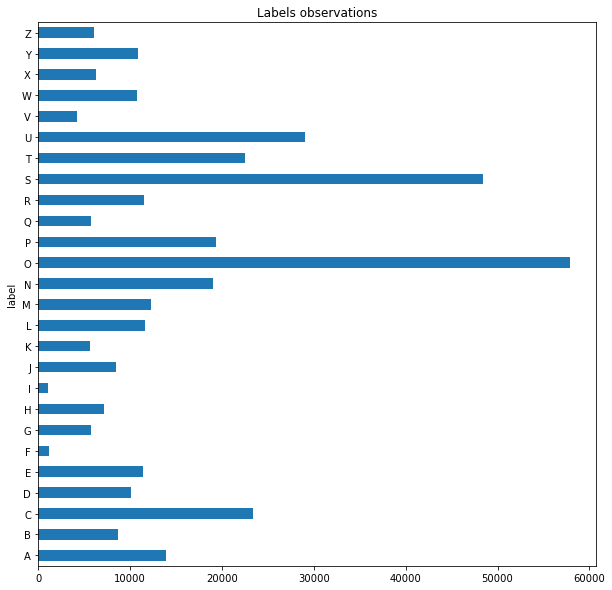

In [7]:
# 데이터 내에 분포 확인
alphabets = {0:'A', 1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',
             7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',
             14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',
             20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
dataset_alphabets = data.copy()
data['label'] = data['label'].map(alphabets)

label_size = data.groupby('label').size()
label_size.plot.barh(figsize=(10, 10))
plt.title('Labels observations')
plt.show()

In [8]:
# 데이터 스케일링
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)
train_scaled[0][:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
# 데이터 reshape
train_scaled = train_scaled.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
test_scaled = test_scaled.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [10]:
# y 데이터 convert
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [26]:
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

# 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=10,  # 회전 범위 설정
    width_shift_range=0.1,  # 가로 이동 범위 설정
    height_shift_range=0.1,  # 세로 이동 범위 설정
    shear_range=0.2,  # 전단 변형 범위 설정
    zoom_range=0.2  # 확대/축소 범위 설정
)

# CNN 모델링
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(BatchNormalization())  # 배치 정규화 추가
model.add(MaxPooling2D(pool_size=(2, 2)))

#합성곱 층과 풀링 층 추가
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 추가된 합성곱 층과 배치 정규화
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())  # 배치 정규화 추가
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

# 하이퍼파라미터 튜닝
learning_rate = 0.001  # 학습률 설정
batch_size = 128  # 배치 크기 설정
dropout_rate = 0.4  # 드롭아웃 비율 설정

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 batch_normalization_4 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                      

In [29]:
# CNN 학습
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)

history = model.fit(datagen.flow(X_train_array.reshape(-1, 28, 28, 1), y_train, batch_size=batch_size),
          steps_per_epoch=len(X_train) // batch_size,
          epochs=10,
          validation_data=(X_test_array.reshape(-1, 28, 28, 1), y_test))

Epoch 1/10
2182/2182 [==============================] - 223s 102ms/step - loss: 0.5550 - accuracy: 0.8369 - val_loss: 0.1291 - val_accuracy: 0.9635
Epoch 2/10
2182/2182 [==============================] - 215s 98ms/step - loss: 0.2651 - accuracy: 0.9221 - val_loss: 0.1016 - val_accuracy: 0.9718
Epoch 3/10
2182/2182 [==============================] - 198s 91ms/step - loss: 0.2241 - accuracy: 0.9343 - val_loss: 0.1012 - val_accuracy: 0.9715
Epoch 4/10
2182/2182 [==============================] - 198s 91ms/step - loss: 0.1993 - accuracy: 0.9421 - val_loss: 0.0909 - val_accuracy: 0.9742
Epoch 5/10
2182/2182 [==============================] - 196s 90ms/step - loss: 0.1856 - accuracy: 0.9465 - val_loss: 0.0801 - val_accuracy: 0.9771
Epoch 6/10
2182/2182 [==============================] - 209s 96ms/step - loss: 0.1767 - accuracy: 0.9489 - val_loss: 0.0801 - val_accuracy: 0.9775
Epoch 7/10
2182/2182 [==============================] - 217s 100ms/step - loss: 0.1673 - accuracy: 0.9515 - val_loss:

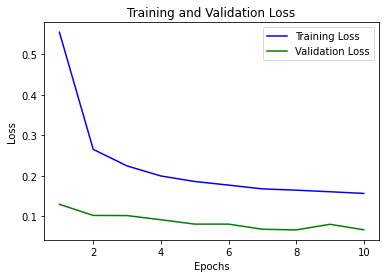

In [37]:
# loss 값 추적
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# loss 값 시각화
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
from keras.models import save_model

# 모델 저장
save_model(model, 'main_CNN_ver2.h5')